___
# Projeto 3 - Ciência dos dados
___

Nomes: Edivaldo Rangel, Gabriel Formario, João Pedro Araujo

Dataframes obtidos no link: https://www.kaggle.com/tmdb/tmdb-movie-metadata 

### Temos como objetivo nesse projeto analisar como as informações obtidas na ficha técnica de um filme podem influenciar em seu sucesso financeiro. Ao analisar os dados podemos descobrir quais dessas informações são mais tedenciosas.

### Com a devida análise, poderemos criar um preditor com base nesses dados(diretor, investimento, gênero do filme,etc) e ter uma noção de como ele se sairá financeiramente. Esse modelo preditor poderia ser utilizado por produtoras para ter expectativa de lucro, além de poder guiar novas produtoras em que tipo de equipe e gênero investir para uma maior garantia de sucesso.

# Predição de sucesso de um filme.

## Análise exploratória

In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
filme = pd.read_csv("tmdb_5000_movies.csv")
creditos = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
filme
filme2= filme.drop_duplicates(subset='title',keep=False)

In [42]:
data = filme2.set_index('title').join(creditos.set_index('title'))
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [6]:
data

In [39]:
data.describe()

budget             id   popularity       revenue      runtime  \
count  4.797000e+03    4797.000000  4797.000000  4.797000e+03  4795.000000   
mean   2.906232e+07   57210.509485    21.492938  8.224613e+07   106.869447   
std    4.074008e+07   88735.919350    31.829961  1.628764e+08    22.621352   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    8.000000e+05    9021.000000     4.668910  0.000000e+00    94.000000   
50%    1.500000e+07   14631.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58626.000000    28.276480  9.292120e+07   117.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count       movie_id  Thriller  Romance   Drama  \
count   4797.000000   4797.000000    4797.000000    4797.0   4797.0  4797.0   
mean       6.091828    690.104023   57210.509485       1.0      1.0     1.0   
std        1.195237   1234.985528   88735.919350       0.0      0.0     0.0   
min        0.000000      0.000000       5.000000       1.0      1.0     1.0   
25%        5.600000     54.000000    9021.000000       1.0      1.0     1.0   
50%        6.200000    235.000000   14631.000000       1.0      1.0     1.0   
75%        6.800000    737.000000   58626.000000       1.0      1.0     1.0   
max       10.000000  13752.000000  459488.000000       1.0      1.0     1.0   

       Family  History     War  Comedy   Music   Crime  Science Fiction  \
count  4797.0   4797.0  4797.0  4797.0  4797.0  4797.0           4797.0   
mean      1.0      1.0     1.0     1.0     1.0     1.0              1.0   
std       0.0      0.0     0.0     0.0     0.0     0.0              0.0   
min       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
25%       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
50%       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
75%       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
max       1.0      1.0     1.0     1.0     1.0     1.0              1.0   

       Adventure  Documentary  Action  Mystery  Western  Fantasy  Horror  \
count     4797.0       4797.0  4797.0   4797.0   4797.0   4797.0  4797.0   
mean         1.0          1.0     1.0      1.0      1.0      1.0     1.0   
std          0.0          0.0     0.0      0.0      0.0      0.0     0.0   
min          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
25%          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
50%          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
75%          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
max          1.0          1.0     1.0      1.0      1.0      1.0     1.0   

       TV Movie  Foreign  Animation  
count    4797.0   4797.0     4797.0  
mean        1.0      1.0        1.0  
std         0.0      0.0        0.0  
min         1.0      1.0        1.0  
25%         1.0      1.0        1.0  
50%         1.0      1.0        1.0  
75%         1.0      1.0        1.0  
max         1.0      1.0        1.0

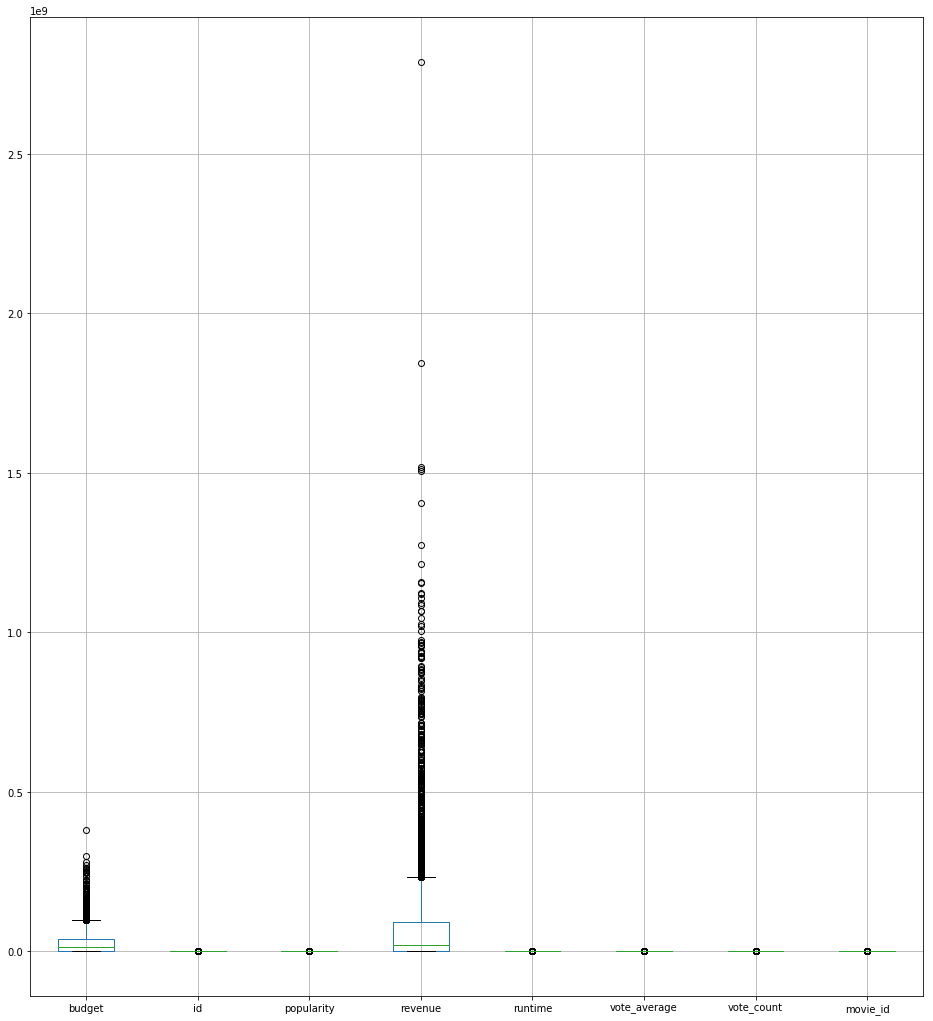

In [44]:
data.boxplot(figsize = (16,18));

In [45]:
rendimento = data.set_index("revenue")

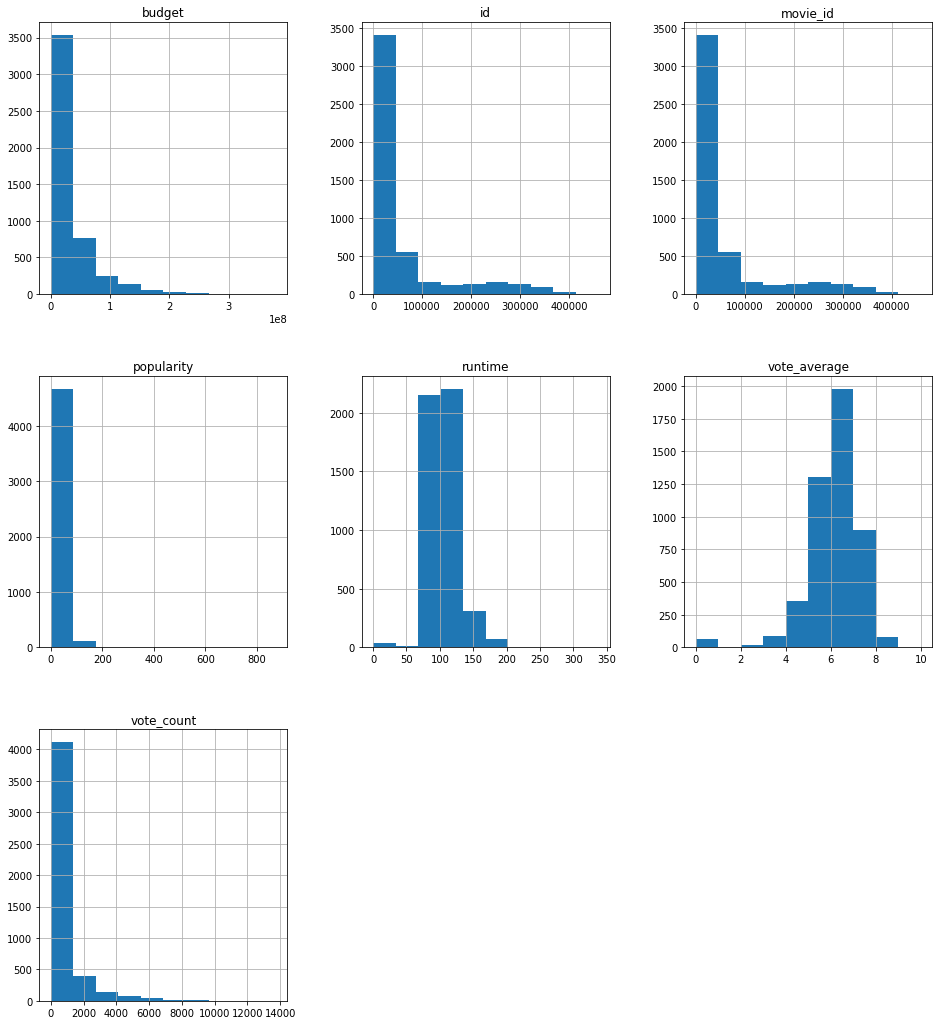

In [47]:
rendimento.hist(figsize = (16,18));

## Dummyfied para gêneros

In [7]:
dados_genero = []
for dado in range(len(data.genres)):
    dados_genero.append(data.genres.iloc[dado])
    
    
    
nomes_genero = []
for genero in dados_genero:
    for nome in eval(genero):
        nomes_genero.append(nome["name"])
        
    data[nome["name"]] = 1

lista_generos = list(dict.fromkeys(nomes_genero))
lista_generos


['Drama',
 'Mystery',
 'Horror',
 'Thriller',
 'Comedy',
 'Romance',
 'Science Fiction',
 'Family',
 'Action',
 'Crime',
 'Adventure',
 'History',
 'Fantasy',
 'War',
 'Music',
 'Documentary',
 'Western',
 'Animation',
 'TV Movie',
 'Foreign']

In [8]:
copia = data.copy()

In [9]:
for genero in lista_generos:
    copia[genero] = 0

In [10]:
copia.head(450)

budget  \
title                                                  
#Horror                                      1500000   
(500) Days of Summer                         7500000   
10 Cloverfield Lane                         15000000   
10 Days in a Madhouse                        1200000   
10 Things I Hate About You                  16000000   
102 Dalmatians                              85000000   
10th & Wolf                                  8000000   
11:14                                        6000000   
12 Angry Men                                  350000   
12 Rounds                                   20000000   
12 Years a Slave                            20000000   
127 Hours                                   18000000   
13 Going on 30                              37000000   
13 Hours: The Secret Soldiers of Benghazi   50000000   
1408                                        25000000   
15 Minutes                                  60000000   
16 Blocks                                   55000000   
16 to Life                                         0   
17 Again                                    20000000   
1776                                               0   
1911                                        30000000   
1941                                        35000000   
1982                                         1000000   
2 Fast 2 Furious                            76000000   
2 Guns                                      61000000   
20 Dates                                           0   
20 Feet from Stardom                         1000000   
20,000 Leagues Under the Sea                 5000000   
200 Cigarettes                               6000000   
2001: A Space Odyssey                       10500000   
...                                              ...   
Banshee Chapter                               950000   
Barbarella                                   9000000   
Barbecue                                     6000000   
Barbershop                                  12000000   
Barbershop 2:  Back in Business             18000000   
Barney's Great Adventure                           0   
Barney's Version                            30000000   
Barnyard                                    51000000   
Barry Lyndon                                11000000   
Barry Munday                                       0   
Basic                                       50000000   
Basic Instinct 2                            70000000   
Basquiat                                     2962051   
Bathing Beauty                               2361000   
Bathory: Countess of Blood                         0   
Batman & Robin                             125000000   
Batman Begins                              150000000   
Batman Forever                             100000000   
Batman Returns                              80000000   
Batman v Superman: Dawn of Justice         250000000   
Batman: The Dark Knight Returns, Part 2      3500000   
Bats                                               0   
Battle for the Planet of the Apes            1700000   
Battle of the Year                          20000000   
Battle: Los Angeles                         70000000   
Battlefield Earth                           44000000   
Battleship                                 209000000   
Be Cool                                     53000000   
Be Kind Rewind                                     0   
Beastly                                     17000000   

                                                                                      genres  \
title                                                                                          
#Horror                                    [{"id": 18, "name": "Drama"}, {"id": 9648, "na...   
(500) Days of Summer                       [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
10 Cloverfield Lane                        [{"id": 53, "name": "Thriller"}, {"id": 878, "...   
10 Days in a Madhouse                

In [11]:
for i in copia.index:
    gen = eval(copia.loc[i,"genres"])
    for l in gen:
        copia.loc[i,l['name']]=1
        
    

In [12]:
copia

budget  \
title                                                 
#Horror                                     1500000   
(500) Days of Summer                        7500000   
10 Cloverfield Lane                        15000000   
10 Days in a Madhouse                       1200000   
10 Things I Hate About You                 16000000   
102 Dalmatians                             85000000   
10th & Wolf                                 8000000   
11:14                                       6000000   
12 Angry Men                                 350000   
12 Rounds                                  20000000   
12 Years a Slave                           20000000   
127 Hours                                  18000000   
13 Going on 30                             37000000   
13 Hours: The Secret Soldiers of Benghazi  50000000   
1408                                       25000000   
15 Minutes                                 60000000   
16 Blocks                                  55000000   
16 to Life                                        0   
17 Again                                   20000000   
1776                                              0   
1911                                       30000000   
1941                                       35000000   
1982                                        1000000   
2 Fast 2 Furious                           76000000   
2 Guns                                     61000000   
20 Dates                                          0   
20 Feet from Stardom                        1000000   
20,000 Leagues Under the Sea                5000000   
200 Cigarettes                              6000000   
2001: A Space Odyssey                      10500000   
...                                             ...   
Young Adult                                12000000   
Young Frankenstein                          2800000   
Young Guns                                 13000000   
Young Sherlock Holmes                      18000000   
Your Highness                              49900000   
Your Sister's Sister                         125000   
Yours, Mine and Ours                              0   
Youth in Revolt                            18000000   
Z Storm                                           0   
ZMD: Zombies of Mass Destruction                  0   
Zack and Miri Make a Porno                 24000000   
Zambezia                                   20000000   
Zathura: A Space Adventure                 65000000   
Zero Dark Thirty                           40000000   
Zero Effect                                 5000000   
Zipper                                            0   
Zodiac                                     65000000   
Zombie Hunter                                     0   
Zombieland                                 23600000   
Zookeeper                                  80000000   
Zoolander                                  28000000   
Zoolander 2                                50000000   
Zoom                                       35000000   
Zulu                                       16000000   
[REC]                                       1500000   
[REC]²                                      5600000   
eXistenZ                                   15000000   
xXx                                        70000000   
xXx: State of the Union                    60000000   
Æon Flux                                   62000000   

                                                                                      genres  \
title                                                                                          
#Horror                                    [{"id": 18, "name": "Drama"}, {"id": 9648, "na...   
(500) Days of Summer                       [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
10 Cloverfield Lane                        [{"id": 53, "name": "Thriller"}, {"id": 878, "...   
10 Days in a Madhouse                                          [{"id": 18, "name": "Drama"}]   
10 

## Dummyfied para diretores

In [13]:
q = data.crew.iloc[338]
for l in eval(q):
    print(l)

{'credit_id': '5564a9c6c3a368072f00208f', 'department': 'Art', 'gender': 2, 'id': 5508, 'job': 'Production Design', 'name': 'Nelson Coates'}
{'credit_id': '5564a8c29251410608001a6d', 'department': 'Camera', 'gender': 2, 'id': 31856, 'job': 'Director of Photography', 'name': 'Brian J. Breheny'}
{'credit_id': '5564a8e59251414222002010', 'department': 'Production', 'gender': 1, 'id': 33437, 'job': 'Producer', 'name': 'Susan Cartsonis'}
{'credit_id': '5564a8ad92514141c7001e28', 'department': 'Sound', 'gender': 2, 'id': 37757, 'job': 'Original Music Composer', 'name': 'David Hirschfelder'}
{'credit_id': '52fe45d59251416c7506413d', 'department': 'Writing', 'gender': 1, 'id': 51680, 'job': 'Novel', 'name': 'Alice Hoffman'}
{'credit_id': '52fe45d59251416c75064137', 'department': 'Writing', 'gender': 1, 'id': 53014, 'job': 'Screenplay', 'name': 'Jessica Bendinger'}
{'credit_id': '52fe45d59251416c75064131', 'department': 'Writing', 'gender': 2, 'id': 63716, 'job': 'Screenplay', 'name': 'John Qua

In [14]:
s = []
for k in range(len(copia.crew)):
    s.append(data.crew.iloc[k])
print(s[0])

[{"credit_id": "545bbac70e0a261fb6002329", "department": "Writing", "gender": 1, "id": 61111, "job": "Screenplay", "name": "Tara Subkoff"}, {"credit_id": "545bbabf0e0a261fb9002212", "department": "Directing", "gender": 1, "id": 61111, "job": "Director", "name": "Tara Subkoff"}, {"credit_id": "545bbae4c3a36853500018a8", "department": "Production", "gender": 1, "id": 61111, "job": "Producer", "name": "Tara Subkoff"}, {"credit_id": "545bbad3c3a3685358001b92", "department": "Production", "gender": 0, "id": 1382445, "job": "Producer", "name": "Jason Ludman"}, {"credit_id": "545bbadbc3a368535d001e74", "department": "Production", "gender": 0, "id": 1382446, "job": "Producer", "name": "Oren Segal"}, {"credit_id": "545bbaf3c3a3685358001b9d", "department": "Production", "gender": 0, "id": 1382448, "job": "Producer", "name": "Brendan Walsh"}]


In [15]:
lista_diretor = []
for k in copia['crew']:
    for m in eval(k):
        if m['job'] == 'Director':
            lista_diretor.append(m['name'])

lista_diretor = set(lista_diretor)
lista_diretor

{'Vivek Agnihotri',
 'Bob Giraldi',
 'Mora Stephens',
 'Stephen Norrington',
 'Steve Carr',
 'Michael Cimino',
 'Sam Fell',
 'Olatunde Osunsanmi',
 'Coky Giedroyc',
 'Dewey Nicks',
 'Darrell James Roodt',
 'Troy Duffy',
 'Tony Richardson',
 'Ning Hao',
 'Jeff Burr',
 'Thomas L. Phillips',
 'Jonathan Dayton',
 'Brian Baugh',
 'Tommy Lee Jones',
 'Mervyn LeRoy',
 'Joachim Rønning',
 'Greg Strause',
 'John Erick Dowdle',
 'Josh Trank',
 'Bong Joon-ho',
 'Gideon Raff',
 'Joseph L. Mankiewicz',
 'Ossie Davis',
 'Cary Bell',
 'Stephen Carpenter',
 'Peyton Reed',
 'Antonio Simoncini',
 'Jehane Noujaim',
 'James Bidgood',
 'Eugenio Derbez',
 'Stephen Langford',
 'Fede Alvarez',
 'Floria Sigismondi',
 'Boris Rodriguez',
 'René Féret',
 'Richard Wallace',
 'Matt Williams',
 'Marc Schölermann',
 'Anonymous',
 'Troy Miller',
 'Peter Hastings',
 'Nicholas Meyer',
 'Drake Doremus',
 'Lee Toland Krieger',
 'Victor Teran',
 'Phil Lord',
 'Thomas Lilti',
 'Dan Ireland',
 'Edgar Wright',
 'Bruno Podalyd

In [16]:
for dire in lista_diretor:
    copia[dire] = 0

In [17]:
eval(copia.loc['#Horror',"crew"])[0]

{'credit_id': '545bbac70e0a261fb6002329',
 'department': 'Writing',
 'gender': 1,
 'id': 61111,
 'job': 'Screenplay',
 'name': 'Tara Subkoff'}

In [18]:

def diretor (filme):
    for k in eval(copia.loc[filme,"crew"]):
        if k['job'] == 'Director':
            return k['name']

In [19]:
diretor('#Horror')

'Tara Subkoff'

In [21]:
for dire in lista_diretor:
    copia[dire] = 0

In [22]:
for z in copia.index:
    copia.loc[z, diretor(z)] = 1


In [23]:
copia.loc["#Horror", diretor("#Horror")] 

1

In [27]:
copia

budget  \
title                                                  
#Horror                                      1500000   
(500) Days of Summer                         7500000   
10 Cloverfield Lane                         15000000   
10 Days in a Madhouse                        1200000   
10 Things I Hate About You                  16000000   
102 Dalmatians                              85000000   
10th & Wolf                                  8000000   
11:14                                        6000000   
12 Angry Men                                  350000   
12 Rounds                                   20000000   
12 Years a Slave                            20000000   
127 Hours                                   18000000   
13 Going on 30                              37000000   
13 Hours: The Secret Soldiers of Benghazi   50000000   
1408                                        25000000   
15 Minutes                                  60000000   
16 Blocks                                   55000000   
16 to Life                                         0   
17 Again                                    20000000   
1776                                               0   
1911                                        30000000   
1941                                        35000000   
1982                                         1000000   
2 Fast 2 Furious                            76000000   
2 Guns                                      61000000   
20 Dates                                           0   
20 Feet from Stardom                         1000000   
20,000 Leagues Under the Sea                 5000000   
200 Cigarettes                               6000000   
2001: A Space Odyssey                       10500000   
2012                                       200000000   
2016: Obama's America                        2500000   
2046                                        12000000   
21                                          35000000   
21 & Over                                   13000000   
21 Grams                                    20000000   
21 Jump Street                              42000000   
22 Jump Street                              50000000   
24 7: Twenty Four Seven                            0   
25th Hour                                   15000000   
27 Dresses                                  30000000   
28 Days                                     43000000   
28 Days Later                                5000000   
28 Weeks Later                              15000000   
2:13                                         3500000   
3 Backyards                                        0   
3 Days to Kill                              28000000   
3 Ninjas Kick Back                                 0   
3 Strikes                                    6000000   
30 Days of Night                            30000000   
...                                              ...   
X2                                         110000000   
Y Tu Mamá También                            5000000   
Year One                                    60000000   
Yeh Jawaani Hai Deewani                      7700000   
Yentl                                       12000000   
Yes                                                0   
Yes Man                                     70000000   
Yesterday Was a Lie                                0   
Yoga Hosers                                  5000000   
Yogi Bear                                   80000000   
You Again                                   20000000   
You Can Count on Me                                0   
You Can't Take It With You                   1644736   
You Don't Mess with the Zohan               90000000   
You Got Served                                     0   
You Kill Me                                  4000000   
You Only Live Twice                          9500000   
You Will Meet a Tall Dark Stranger          22000000   
You've Got Mail                             65000000   
You, Me and Du

In [59]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
copia.dropna(axis='columns', inplace=True)


## Seperação entre teste e treino

In [55]:
# Separa X e Y teste

In [56]:
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

In [57]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(copia, test_size=0.2)

In [58]:
train

budget  \
title                                                   
Life or Something Like It                    40000000   
Thor: The Dark World                        170000000   
Heroes of Dirt                                      0   
Animals United                                      0   
Taken                                        25000000   
The Lake House                               40000000   
Can't Hardly Wait                            10000000   
Saints and Soldiers                            780000   
The Greatest Show on Earth                    4000000   
Psycho                                         806948   
Casablanca                                     878000   
Ratatouille                                 150000000   
Memento                                       9000000   
The Masked Saint                                    0   
Scott Pilgrim vs. the World                  60000000   
Before Sunset                                 2700000   
The Station Agent                              500000   
American Dreamz                              17000000   
Trainspotting                                 4000000   
Wild Grass                                          0   
Christmas Eve                                       0   
Deep Rising                                  45000000   
The Life Aquatic with Steve Zissou           50000000   
Bullets Over Broadway                               0   
The Four Feathers                            35000000   
Rudderless                                    5000000   
The Switch                                   19000000   
Bad Grandpa                                  15000000   
The Original Kings of Comedy                        0   
Private Benjamin                                    0   
Julia                                               0   
Princess Mononoke                            26500000   
Pan                                         150000000   
The Messenger: The Story of Joan of Arc      60000000   
The Blue Room                                       0   
Guess Who                                    35000000   
Tangled                                     260000000   
Pink Flamingos                                  12000   
History of the World: Part I                 11000000   
The Lost City                                 9600000   
The Case of the Grinning Cat                        0   
The Pet                                             0   
The Nun's Story                               3500000   
Kiss of the Dragon                           25000000   
Gettysburg                                          0   
Dark City                                    27000000   
The Invasion                                 80000000   
Antitrust                                    30000000   
Keanu                                        15000000   
The Great Raid                               80000000   
...                                               ...   
Vessel                                              0   
16 Blocks                                    55000000   
Twins                                        15000000   
The Girl Next Door                           25000000   
Oliver!                                      10000000   
The Haunting of Molly Hartley                       0   
Unstoppable                                 100000000   
Krrish                                              0   
Aroused                                             0   
Arbitrage                                    12000000   
Scary Movie 4                                45000000   
The Business of Strangers                           0   
Snakes on a Plane                            33000000   
Scream 3                                     40000000   
My Favorite Martian                          65000000   
There Be Dragons                                    0   
I Am Legend                                 150000000   
Journey from the Fall                         1300000   


In [63]:
lista_diretor

{'Vivek Agnihotri',
 'Bob Giraldi',
 'Mora Stephens',
 'Stephen Norrington',
 'Steve Carr',
 'Michael Cimino',
 'Sam Fell',
 'Olatunde Osunsanmi',
 'Coky Giedroyc',
 'Dewey Nicks',
 'Darrell James Roodt',
 'Troy Duffy',
 'Tony Richardson',
 'Ning Hao',
 'Jeff Burr',
 'Thomas L. Phillips',
 'Jonathan Dayton',
 'Brian Baugh',
 'Tommy Lee Jones',
 'Mervyn LeRoy',
 'Joachim Rønning',
 'Greg Strause',
 'John Erick Dowdle',
 'Josh Trank',
 'Bong Joon-ho',
 'Gideon Raff',
 'Joseph L. Mankiewicz',
 'Ossie Davis',
 'Cary Bell',
 'Stephen Carpenter',
 'Peyton Reed',
 'Antonio Simoncini',
 'Jehane Noujaim',
 'James Bidgood',
 'Eugenio Derbez',
 'Stephen Langford',
 'Fede Alvarez',
 'Floria Sigismondi',
 'Boris Rodriguez',
 'René Féret',
 'Richard Wallace',
 'Matt Williams',
 'Marc Schölermann',
 'Anonymous',
 'Troy Miller',
 'Peter Hastings',
 'Nicholas Meyer',
 'Drake Doremus',
 'Lee Toland Krieger',
 'Victor Teran',
 'Phil Lord',
 'Thomas Lilti',
 'Dan Ireland',
 'Edgar Wright',
 'Bruno Podalyd

# __*Regress*__ Múltipla

In [31]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [70]:
reg = train.drop(columns= ['genres'])
reg = train.drop(columns= ['crew'])

In [71]:
reg.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'revenue',
       ...
       'Ronan Chapalain', 'Christian Robinson', 'Adam Goldberg',
       'Mathieu Amalric', 'Dan Rush', 'Nick Park', 'Mary Lambert',
       'Joel Edgerton', 'Kris Pearn', 'Stuart Gillard'],
      dtype='object', length=2610)

In [72]:
Y = reg["revenue"]

In [73]:
X = reg[['budget','popularity', 'vote_average','Thriller', 'Romance', 'Drama', 'Family',
       'History', 'War', 'Comedy', 'Music', 'Crime', 'Science Fiction',
       'Adventure', 'Documentary', 'Action', 'Mystery', 'Western', 'Fantasy',
       'Horror', 'TV Movie', 'Foreign', 'Animation'

]]

In [74]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     9.444
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:49:01   Log-Likelihood:                -94665.
No. Observations:                4797   AIC:                         1.912e+05
Df Residuals:                    3865   BIC:                         1.972e+05
Df Model:                         931                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -6.562e+07   1.01e+07     -6.479      0.000   -8.55e+07   -4.58e+07
budget                          2.0651      0.053     39.083      0.000       1.961       2.169
popularity                   1.961e+06   7.07e+04     27.717      0.000    1.82e+06     2.1e+06
vote_average                 9.884e+06   1.59e+06      6.219      0.000    6.77e+06     1.3e+07
Thriller                    -1.073e+07   4.53e+06     -2.371      0.018   -1.96e+07   -1.86e+06
Romance                      8.512e+06   4.58e+06      1.861      0.063   -4.58e+05    1.75e+07
Drama                       -1.659e+07   4.13e+06     -4.013      0.000   -2.47e+07   -8.48e+06
Family                       1.219e+07   6.76e+06      1.802      0.072   -1.07e+06    2.54e+07
History                     -2.306e+07   8.95e+06     -2.576      0.010   -4.06e+07   -5.51e+06
War                         -1.045e+07      1e+07     -1.040      0.298   -3.02e+07    9.25e+06
Comedy                      -6.943e+06   4.18e+06     -1.660      0.097   -1.51e+07    1.26e+06
Music                        1.556e+06    8.8e+06      0.177      0.860   -1.57e+07    1.88e+07
Crime                       -1.019e+07   5.02e+06     -2.030      0.042      -2e+07   -3.51e+05
Science Fiction             -1.503e+07   5.75e+06     -2.611      0.009   -2.63e+07   -3.74e+06
Adventure                    1.705e+07   5.26e+06      3.241      0.001    6.74e+06    2.74e+07
Documentary                  2.211e+05   1.28e+07      0.017      0.986   -2.49e+07    2.54e+07
Action                      -6.653e+06    4.7e+06     -1.415      0.157   -1.59e+07    2.56e+06
Mystery                     -8.644e+06   6.46e+06     -1.338      0.181   -2.13e+07    4.02e+06
Western                     -3.063e+07   1.22e+07     -2.512      0.012   -5.45e+07   -6.73e+06
Fantasy                      4.986e+06   6.14e+06      0.812      0.417   -7.05e+06     1.7e+07
Horror                         2.5e+06    6.2e+06      0.403      0.687   -9.66e+06    1.47e+07
TV Movie                     1.573e+07   4.36e+07      0.360      0.719   -6.98e+07    1.01e+08
Foreign                      1.568e+07   2.31e+07      0.678      0.498   -2.97e+07     6.1e+07
Animation                    5.788e+06   9.85e+06      0.588      0.557   -1.35e+07    2.51e+07
Vivek Agnihotri                4.1e+07      1e+08      0.408      0.683   -1.56e+08    2.38e+08
Bob Giraldi                  2.727e+07      1e+08      0.271      0.786    -1.7e+08    2.24e+08
Mora Stephens                2.188e+07      1e+08      0.218      0.827   -1.75e+08    2.19e+08
Stephen Norrington          -4.012e+07   7.11e+07     -0.564      0.573    -1.8e+08    9.93e+07
Steve Carr                   2.713e+07   5.04e+07      0.538      0.591   -7.17e+07    1.26e+08
Michael Cim

In [68]:
results.params["Thriller"]

-9768482.095483456

In [84]:
results.pvalues

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0.06288839317497111] of <class 'float'>